In [108]:
import pandas as pd
import numpy as np

In [125]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=30160e48a6bbdff6596825b094e60a369344b14bc167f17076aa9a47cbb4f3ee
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=1cf729a41f0075f746966b2ad0a22447f2b23a01fececa720fb6046244ddedde
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [116]:
url = "/content/metabolitos.xlsx"
matrix = pd.read_excel(url,sheet_name=0)

In [117]:
matrix = matrix.set_index('Folio')

In [118]:
label = pd.DataFrame()
label['label']= matrix.T['Compound']

In [123]:
matrix = matrix.T.iloc[:,:-1]

In [124]:
matrix

Folio,19.04_135.1202n,19.04_321.1956n,26.15_61.9891n,19.04_132.0899n,17.18_273.2874n,26.15_84.9444n,19.11_27.0532n,12.36_678.5369n,17.44_293.2914n,19.04_164.1479n,...,3.70_204.1511m/z,2.95_79.0078m/z,2.11_118.1035m/z,1.98_104.1159m/z,1.67_84.9525m/z,1.62_204.9771m/z,1.62_116.9921m/z,1.62_88.9774m/z,1.62_78.9834m/z,1.62_60.9491m/z
PAG_2300505 Temefos C1,51.302329,32.874372,128.446032,315.938431,538.881047,41.937987,17.139046,248.303601,8.766193,107.768458,...,2.166178,0.837811,3.430867,1.387751,6.287103,1.41446,1.284692,1.436877,1.599941,2.459327
PAG_2300505 Temefos C2,55.107518,36.439942,134.282931,354.331721,774.156702,43.513592,17.127133,267.377699,6.152025,120.722611,...,6.770345,0.695237,5.9678,3.531618,6.311686,2.563092,1.833487,2.00277,2.310382,3.453733
PAG_2300505 Temefos C3,53.643018,30.816697,116.506591,289.550462,482.358636,37.108577,16.580194,290.178637,10.129316,105.614797,...,6.037825,1.260637,5.176413,2.397927,5.456489,1.473242,1.754593,1.431382,1.765513,2.568839
PAG_2300505 Temefos C4,52.577018,32.531302,130.558656,333.910956,705.395312,41.234153,17.374895,261.456391,10.539224,117.096948,...,2.116377,0.823168,5.163128,1.406574,5.203842,1.275502,1.117688,1.07919,1.555572,2.267384
PAG_2300505 Temefos C5,54.754759,33.812374,128.364481,326.291163,573.161432,41.792352,17.844485,307.875203,8.379834,112.556846,...,2.518807,0.750206,4.425324,1.267251,6.606352,2.040406,1.514227,1.771749,1.989632,3.011064
PAG_2300505 Temefos C6,47.71733,29.731582,121.71179,281.57436,678.547218,39.709838,15.370026,287.426375,8.581199,95.655992,...,2.50062,1.299446,4.540444,2.183726,4.601585,1.406955,1.126227,1.485321,1.705963,2.644825
PAG_2300505 Temefos A1,52.970106,32.613911,136.45833,334.494898,503.625102,42.484389,18.990703,275.596226,7.37166,115.913985,...,3.014108,0.783487,5.971355,2.105199,11.065349,2.486038,1.809642,2.217436,2.077154,3.267689
PAG_2300505 Temefos A2,57.483264,34.687727,115.972261,337.570341,507.400803,37.284562,19.29269,343.72121,6.297248,121.805915,...,1.82241,0.80101,3.091179,1.809616,14.159061,2.10594,1.414955,1.638288,1.874211,2.751923
PAG_2300505 Temefos A3,45.117529,29.591459,126.318863,282.328166,650.473467,40.084436,13.419843,294.243541,8.811243,93.63727,...,2.132034,0.870673,3.959389,1.662711,5.183456,1.930615,1.237698,1.285815,1.915996,2.654656
PAG_2300505 Temefos A4,50.635825,30.553467,123.278943,307.075995,551.556901,39.037504,17.967562,240.794366,7.994744,109.129921,...,2.814233,0.954314,4.220443,1.783558,5.820587,2.217994,1.597983,1.836415,2.128863,3.529034


In [134]:
from umap import UMAP
model = UMAP(n_components = 2,  verbose = 2, metric='cosine',random_state=10,n_neighbors=15,n_epochs=5000)
umap_2d = model.fit_transform(matrix)
CONTI_DF = pd.DataFrame(umap_2d,columns=['UMAP1','UMAP2'],index=matrix.index) 


UMAP(angular_rp_forest=True, metric='cosine', n_epochs=5000, random_state=10, verbose=2)
Tue May 16 16:03:08 2023 Construct fuzzy simplicial set
Tue May 16 16:03:08 2023 Finding Nearest Neighbors
Tue May 16 16:03:08 2023 Finished Nearest Neighbor Search
Tue May 16 16:03:08 2023 Construct embedding


Epochs completed:   0%|            0/5000 [00:00]

Tue May 16 16:03:10 2023 Finished embedding


In [135]:
import plotly.express as px
# labels labels_umap_
fig = px.scatter(CONTI_DF, x='UMAP1', y='UMAP2', color=label['label'])

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
    
})
fig.update_traces(marker=dict(size=15))
fig.update_layout(
    xaxis_title="UMAP 1",
    yaxis_title="UMAP 2")

fig.update_layout(
    title={
        'text': "",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(marker=dict(size=15,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

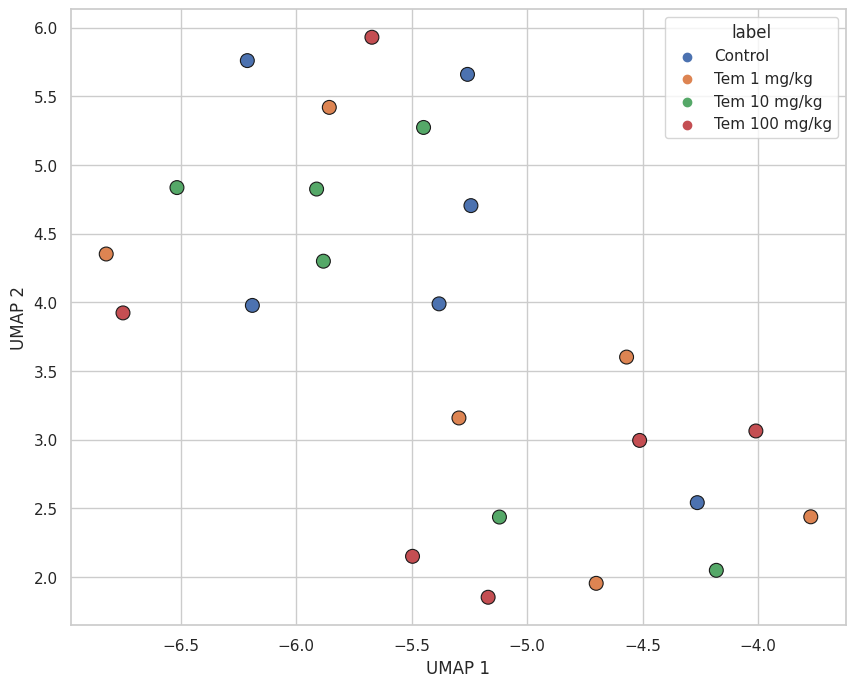

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot with Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=CONTI_DF, x='UMAP1', y='UMAP2', hue=label['label'], s=100, edgecolor='k')

# Customize the plot
plt.title("")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

# Show the plot
plt.show()


In [138]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=1)#n_components = 50 
pca.fit(matrix)
X_pca = pca.transform(matrix)


In [139]:
CONTI_DF = pd.DataFrame(X_pca,columns=['PCA-1','PCA-2'],index=matrix.index) 


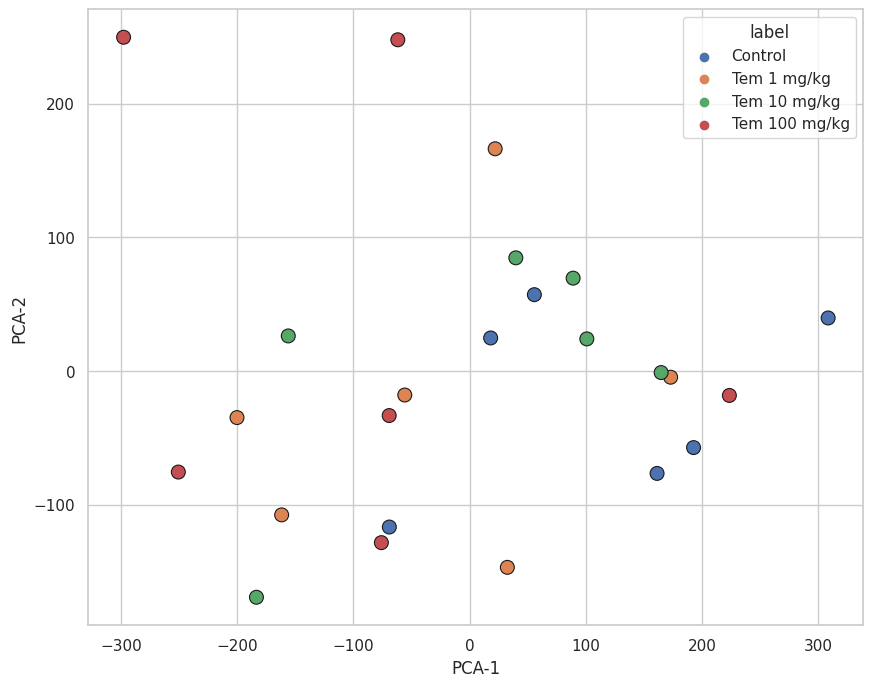

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot with Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=CONTI_DF, x='PCA-1', y='PCA-2', hue=label['label'], s=100, edgecolor='k')

# Customize the plot
plt.title("")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")

# Show the plot
plt.show()


In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15,random_state=1)#n_components = 50 
pca.fit(matrix)
X_pca = pca.transform(matrix)


In [155]:
from umap import UMAP
model = UMAP(n_components = 2,  verbose = 2, metric='mahalanobis',random_state=10,n_neighbors=15,n_epochs=5000)
umap_2d = model.fit_transform(X_pca)
CONTI_DF = pd.DataFrame(umap_2d,columns=['UMAP1','UMAP2'],index=matrix.index) 


UMAP(metric='mahalanobis', n_epochs=5000, random_state=10, verbose=2)
Tue May 16 16:15:17 2023 Construct fuzzy simplicial set
Tue May 16 16:15:18 2023 Finding Nearest Neighbors
Tue May 16 16:15:18 2023 Finished Nearest Neighbor Search
Tue May 16 16:15:18 2023 Construct embedding


Epochs completed:   0%|            0/5000 [00:00]

Tue May 16 16:15:21 2023 Finished embedding


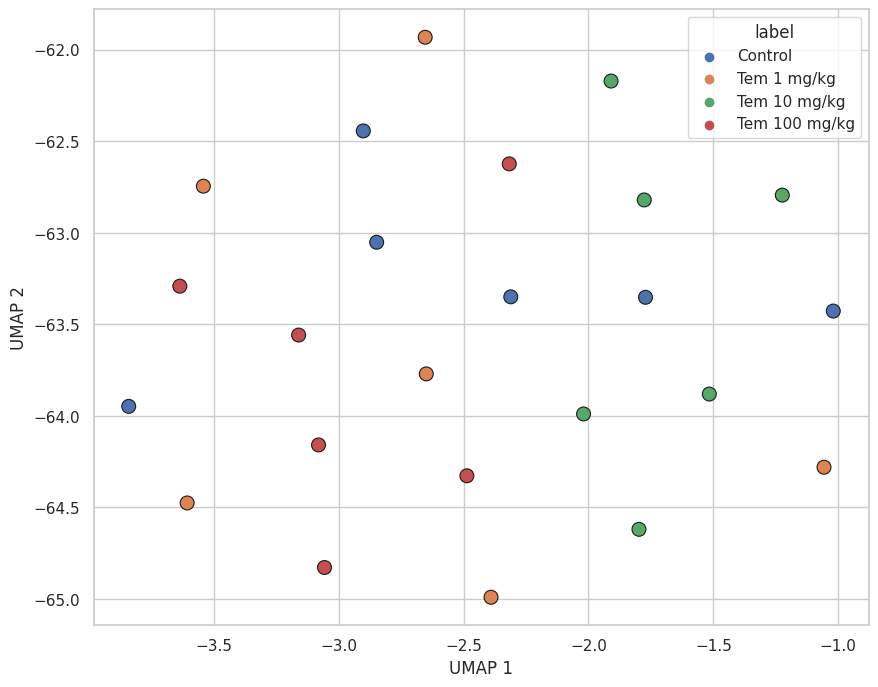

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot with Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=CONTI_DF, x='UMAP1', y='UMAP2', hue=label['label'], s=100, edgecolor='k')

# Customize the plot
plt.title("")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

# Show the plot
plt.show()
